In [2]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Data Understanding and Preparation

In [3]:
#Reading the file companies
companies = pd.read_csv("companies.txt",encoding='ISO-8859-1',delimiter='\t')
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [4]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [5]:
#Reading file rounds2
round2 = pd.read_csv("rounds2.csv",encoding='ISO-8859-1')
round2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [6]:
round2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


#### How many unique companies are present in rounds2?

In [7]:
#convert the company permalink data into lower case for checking the unique companies in rounds2 
round2['company_permalink']=round2['company_permalink'].apply(lambda x:x.lower())
round2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [8]:
#to remove the junk from the dataframe rounds2
round2['company_permalink']=round2['company_permalink'].apply(lambda x:x.encode('utf-8').decode('ascii','ignore'))

In [9]:
#check unique companies
round2['company_permalink'].nunique()

66368

#### How many unique companies are present in the companies file?

In [10]:
#convert the data of permalink column into lower case for checking the unique companies in companies dataframe
companies['permalink']=companies['permalink'].apply(lambda x:x.lower())
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [11]:
companies['permalink'] = companies['permalink'].apply(lambda x:x.encode('utf-8').decode('ascii','ignore'))

In [12]:
#check unique companies
companies['permalink'].nunique()

66368

#### In the companies data frame, which column can be used as the  unique key for each company? Write the name of the column

In [13]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In companies data frame there are total 66368 entries and only 2 columns have NON-NULL data i.e. (permalink and status) but status has repeated data with itself and permalink has 66368 unique entries in it so PERMALINK can be used as the unique key for each company

In [14]:
#Are there any companies in the rounds2 file which are not present in companies
s1 =set(round2.company_permalink)
s2 = set(companies.permalink)
print(s1.difference(s2))

set()


#### Merge the two data frames so that all  variables (columns)  in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame ?

In [15]:
#merging of two data frames
master_frame=pd.merge(companies,round2,how='inner',left_on='permalink',right_on='company_permalink')
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [16]:
#check the master_frame info 
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   permalink                114949 non-null  object 
 1   name                     114948 non-null  object 
 2   homepage_url             108815 non-null  object 
 3   category_list            111539 non-null  object 
 4   status                   114949 non-null  object 
 5   country_code             106271 non-null  object 
 6   state_code               104003 non-null  object 
 7   region                   104782 non-null  object 
 8   city                     104785 non-null  object 
 9   founded_at               94428 non-null   object 
 10  company_permalink        114949 non-null  object 
 11  funding_round_permalink  114949 non-null  object 
 12  funding_round_type       114949 non-null  object 
 13  funding_round_code       31140 non-null   object 
 14  fund

By checking info of master_frame there are total 114949 observations

# -----------------------------------------------------------

# Funding Type Analysis

In [17]:
master_frame.isnull().sum()

permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [18]:
#check the empty data in the form of percentage
round(100*(master_frame.isnull().sum())/len(master_frame.index))

permalink                   0.0
name                        0.0
homepage_url                5.0
category_list               3.0
status                      0.0
country_code                8.0
state_code                 10.0
region                      9.0
city                        9.0
founded_at                 18.0
company_permalink           0.0
funding_round_permalink     0.0
funding_round_type          0.0
funding_round_code         73.0
funded_at                   0.0
raised_amount_usd          17.0
dtype: float64

So, from above analysis it is clearly seen that the data in funding_round_code is containing 73% of empty data so we have to drop that column...and permalink and company_permalink provides same kind of information..so we have to drop one of them also

In [19]:
master_frame.drop(labels=['funding_round_code','company_permalink','founded_at','funded_at','state_code','homepage_url','region'],axis=1,inplace=True)

In [20]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   permalink                114949 non-null  object 
 1   name                     114948 non-null  object 
 2   category_list            111539 non-null  object 
 3   status                   114949 non-null  object 
 4   country_code             106271 non-null  object 
 5   city                     104785 non-null  object 
 6   funding_round_permalink  114949 non-null  object 
 7   funding_round_type       114949 non-null  object 
 8   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(8)
memory usage: 8.8+ MB


In [21]:
round(100*(master_frame.isnull().sum())/len(master_frame.index))

permalink                   0.0
name                        0.0
category_list               3.0
status                      0.0
country_code                8.0
city                        9.0
funding_round_permalink     0.0
funding_round_type          0.0
raised_amount_usd          17.0
dtype: float64

In [22]:
master_frame.category_list.describe()

count            111539
unique            27296
top       Biotechnology
freq               8165
Name: category_list, dtype: object

In [23]:
master_frame['category_list'] = master_frame['category_list'].fillna('Biotechnology')

In [24]:
round(100*(master_frame.isnull().sum())/len(master_frame.index))

permalink                   0.0
name                        0.0
category_list               0.0
status                      0.0
country_code                8.0
city                        9.0
funding_round_permalink     0.0
funding_round_type          0.0
raised_amount_usd          17.0
dtype: float64

In [25]:
master_frame.country_code.describe()

count     106271
unique       137
top          USA
freq       72308
Name: country_code, dtype: object

In [26]:
master_frame['country_code'] = master_frame['country_code'].fillna('USA')

In [27]:
round(100*(master_frame.isnull().sum())/len(master_frame.index))

permalink                   0.0
name                        0.0
category_list               0.0
status                      0.0
country_code                0.0
city                        9.0
funding_round_permalink     0.0
funding_round_type          0.0
raised_amount_usd          17.0
dtype: float64

In [28]:
master_frame.city.describe()

count            104785
unique             5111
top       San Francisco
freq               7422
Name: city, dtype: object

In [29]:
master_frame['city'] = master_frame['city'].fillna('San Francisco')

In [30]:
round(100*(master_frame.isnull().sum())/len(master_frame.index))

permalink                   0.0
name                        0.0
category_list               0.0
status                      0.0
country_code                0.0
city                        0.0
funding_round_permalink     0.0
funding_round_type          0.0
raised_amount_usd          17.0
dtype: float64

In [31]:
master_frame.raised_amount_usd.describe()

count    9.495900e+04
mean     1.042687e+07
std      1.148212e+08
min      0.000000e+00
25%      3.225000e+05
50%      1.680511e+06
75%      7.000000e+06
max      2.127194e+10
Name: raised_amount_usd, dtype: float64

In [32]:
m=master_frame['raised_amount_usd'].median()
master_frame['raised_amount_usd'] = master_frame['raised_amount_usd'].fillna(m)

In [33]:
round(100*(master_frame.isnull().sum())/len(master_frame.index))

permalink                  0.0
name                       0.0
category_list              0.0
status                     0.0
country_code               0.0
city                       0.0
funding_round_permalink    0.0
funding_round_type         0.0
raised_amount_usd          0.0
dtype: float64

### Funding Type Analysis

Spark Funds wants to choose one of these four investment types(venture, angel, seed, and private equity) for each potential investment they will make.

1. Calculate the most representative value of the investment amount for each of the four funding types (venture, angel, seed, and private equity)

As mentioned above we have to extract data where funding_round_type is venture, angel, seed, and private equity

In [34]:
funding_df=master_frame.groupby(by='funding_round_type')['raised_amount_usd'].mean().sort_values(ascending=False)
funding_df.astype(int)

funding_round_type
post_ipo_debt            168704571
post_ipo_equity           80920707
private_equity            62368461
secondary_market          26302338
debt_financing            16568932
venture                   10793523
undisclosed                7353956
grant                      4210064
convertible_note           1499677
product_crowdfunding       1381709
equity_crowdfunding        1249884
non_equity_assistance      1195382
angel                      1104858
seed                        937645
Name: raised_amount_usd, dtype: int32

In [35]:
funding_df2= master_frame[master_frame['funding_round_type']=='venture']

In [36]:
funding_df2.head()

,permalink,name,category_list,status,country_code,city,funding_round_permalink,funding_round_type,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,Mumbai,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.0
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,Delaware City,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,1680511.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,operating,USA,San Francisco,/funding-round/650b8f704416801069bb178a1418776b,venture,3406878.0
4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,Beijing,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,2000000.0
5,/organization/004-technologies,004 Technologies,Software,operating,USA,Champaign,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,1680511.0


# ------------------------------------------------------------------

# Country Analysis

#### Spark Funds wants to invest in countries with the highest amount of funding for the chosen investment type

1. It wants to invest only in English-speaking countries because of the ease of communication with the companies it would invest in.
2. Consider a country to be English speaking only if English is one of the official languages in that country

So First i am going to extract only those countries where official languages is english

fetch the list of english- speaking countries from the given link i.e.
https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language

From the english-speaking-countries, the data has been scrapped and saved into a csv file for further convenience.
Thus, from now we will load the data from our local machine.

In [37]:
#country=pd.read_html(r'https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language')
#table1=data[0]
#table2=data[1]
#table1 =table1[[2:5]]
#table2 =table2[[2:5]]
#table1=table1.loc[1:,:]
#table2=table2.loc[1:,:]
#table2[5] = table2[5].apply(lambda x:x.split(' ')[0])
#country_df = pd.concat([table1,table2],axis=0,ignore_index=True)
#country_df.to_csv('d:\\country_df.csv',index=False,)
#Then concatenate the above two tables & extract all the countries where the primary language is English(i.e. Yes)

In [38]:
country_df=pd.read_csv(r'countries.csv')
country_df.head()

,country_code,Official_lang
0,AUS,Yes
1,NZL,Yes
2,GBR,Yes
3,USA,Yes
4,ATG,Yes


In [39]:
#Hence there are total 60 countries where official language is ENGLISH
len(country_df)

60

In [40]:
# Extract the data from the master_frame across ALL sectors for the chosen investment type i.e. VENTURE
m1 = pd.merge(funding_df2,country_df,how='inner',on='country_code')
m1.head()

,permalink,name,category_list,status,country_code,city,funding_round_permalink,funding_round_type,raised_amount_usd,Official_lang
0,/organization/-fame,#fame,Media,operating,IND,Mumbai,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.0,No
1,/organization/1000lookz,1000Lookz,Beauty,operating,IND,Chennai,/funding-round/e07f6e580046d00c7aeb33fafb9d90a3,venture,1680511.0,No
2,/organization/21diamonds-india,21Diamonds,E-Commerce,operating,IND,Gurgaon,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,6369507.0,No
3,/organization/247-learning-private,24x7 Learning,EdTech|Education|Systems,operating,IND,Bangalore,/funding-round/4cd5cd165bc869bc40705a9e4b626bee,venture,4000000.0,No
4,/organization/3dsoc,3DSoC,3D|Mobile,operating,IND,Bangalore,/funding-round/bbedf1410fddeed341018583bbd0ca1e,venture,1240000.0,No


#### Spark Funds wants to see the top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type)

In [41]:
m1_by_country = m1.groupby(by='country_code')
total_funding = m1_by_country['raised_amount_usd'].sum().sort_values(ascending=False).apply(lambda x: '{:.1f}'.format(x)).head(9)
total_funding

country_code
USA    453043359611.0
GBR     20662394144.0
IND     14674184566.0
CAN      9734578307.0
SGP      2906512093.0
IRL      1761837411.0
AUS      1353184146.0
NZL       451677405.0
ZAF       257590015.0
Name: raised_amount_usd, dtype: object

In [42]:
#For the chosen investment type, make a data frame named top9 with the top nine countries (based on the total investment amount each country has received)
top9=pd.DataFrame(data=total_funding)
top9

,raised_amount_usd
country_code,
USA,453043359611.0
GBR,20662394144.0
IND,14674184566.0
CAN,9734578307.0
SGP,2906512093.0
IRL,1761837411.0
AUS,1353184146.0
NZL,451677405.0
ZAF,257590015.0


#### Top three English-speaking countries in the data frame top9.

In [43]:
top9.head(3)

,raised_amount_usd
country_code,
USA,453043359611.0
GBR,20662394144.0
IND,14674184566.0


# -------------------------------------------------------------

# Sector Analysis 1

Now we also know the three most investment-friendly countries and the most suited funding type for Spark Funds. Let us now focus on finding the best sectors in these countries.

When we say sector analysis, we refer to one of the eight main sectors...so we have to drop that rows which provide NULL values to category_list..because NULL values do not refer to any sector. You discuss with the CEO and come up with the business rule that the first string before the vertical bar will be considered the primary sector.

In [163]:
# Reading file mapping
mapping=pd.read_csv("mapping.csv")
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [164]:
# Using melt function in mapping
melt_frame=pd.melt(mapping,id_vars=['category_list'],var_name='main_sector')
melt_frame=melt_frame[melt_frame['value']==1]
melt_frame

,category_list,main_sector,value
8,Adventure Travel,Automotive & Sports,1
14,Aerospace,Automotive & Sports,1
45,Auto,Automotive & Sports,1
46,Automated Kiosk,Automotive & Sports,1
47,Automotive,Automotive & Sports,1
...,...,...,...
6121,Social Recruiting,"Social, Finance, Analytics, Advertising",1
6122,Social Television,"Social, Finance, Analytics, Advertising",1
6123,Social Travel,"Social, Finance, Analytics, Advertising",1
6134,Stock Exchanges,"Social, Finance, Analytics, Advertising",1


In [165]:
#Extract the primary sector of each category list from the category_list column
funding_df2['category_list']=funding_df2['category_list'].apply(lambda x:x.split('|')[0])
funding_df2.head()

,permalink,name,category_list,status,country_code,city,funding_round_permalink,funding_round_type,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,Mumbai,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.0
1,/organization/-qounter,:Qounter,Application Platforms,operating,USA,Delaware City,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,1680511.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps,operating,USA,San Francisco,/funding-round/650b8f704416801069bb178a1418776b,venture,3406878.0
4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,Beijing,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,2000000.0
5,/organization/004-technologies,004 Technologies,Software,operating,USA,Champaign,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,1680511.0


#### Code for a merged data frame with each primary sector mapped to its main sector (the primary sector should be present in a separate column).

In [166]:
melt_merge=pd.merge(funding_df2,melt_frame,left_on='category_list',right_on='category_list')
melt_merge.head()

,permalink,name,category_list,status,country_code,city,funding_round_permalink,funding_round_type,raised_amount_usd,main_sector,value
0,/organization/-fame,#fame,Media,operating,IND,Mumbai,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.0,Entertainment,1
1,/organization/90min,90min,Media,operating,GBR,London,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,15000000.0,Entertainment,1
2,/organization/90min,90min,Media,operating,GBR,London,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,5800000.0,Entertainment,1
3,/organization/90min,90min,Media,operating,GBR,London,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,18000000.0,Entertainment,1
4,/organization/all-def-digital,All Def Digital,Media,operating,USA,Los Angeles,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,5000000.0,Entertainment,1


In [167]:
#To check unique main sector in the data frame
melt_merge['main_sector'].nunique()

8

# --------------------------------------------------------------

# Sector Analysis 2

Now, the aim is to find out the most heavily invested main sectors in each of the three countries (for funding type FT and investments range of 5-15 M USD).

In [168]:
# Now creating 3 separate dataframes d1(USA),d2(G.B.R) and d3(India).
d1=pd.DataFrame(melt_merge[(melt_merge['raised_amount_usd']>=5000000) & (melt_merge['raised_amount_usd']<=15000000.0) & (melt_merge['country_code']==top9.index[0])])
d2=pd.DataFrame(melt_merge[(melt_merge['raised_amount_usd']>=5000000) & (melt_merge['raised_amount_usd']<=15000000.0) & (melt_merge['country_code']==top9.index[1])])
d3=pd.DataFrame(melt_merge[(melt_merge['raised_amount_usd']>=5000000) & (melt_merge['raised_amount_usd']<=15000000.0) & (melt_merge['country_code']==top9.index[2])])

In [169]:
d1.head()

,permalink,name,category_list,status,country_code,city,funding_round_permalink,funding_round_type,raised_amount_usd,main_sector,value
4,/organization/all-def-digital,All Def Digital,Media,operating,USA,Los Angeles,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,5000000.0,Entertainment,1
16,/organization/chefs-feed,ChefsFeed,Media,operating,USA,San Francisco,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,5000000.0,Entertainment,1
25,/organization/huffingtonpost,The Huffington Post,Media,acquired,USA,New York,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,5000000.0,Entertainment,1
26,/organization/huffingtonpost,The Huffington Post,Media,acquired,USA,New York,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,5000000.0,Entertainment,1
36,/organization/matchmine,MatchMine,Media,closed,USA,Needham,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,10000000.0,Entertainment,1


In [170]:
d2.head()

,permalink,name,category_list,status,country_code,city,funding_round_permalink,funding_round_type,raised_amount_usd,main_sector,value
1,/organization/90min,90min,Media,operating,GBR,London,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,15000000.0,Entertainment,1
2,/organization/90min,90min,Media,operating,GBR,London,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,5800000.0,Entertainment,1
102,/organization/common-interest-communities,Common Interest Communities,Application Platforms,operating,GBR,London,/funding-round/8195587cbd5e51af7514ee92ef4ba6ba,venture,10000000.0,"News, Search and Messaging",1
118,/organization/geospock-ltd-,GeoSpock Ltd.,Application Platforms,operating,GBR,Cambridge,/funding-round/cf3fe3b7c86186b9f478d0ea37613f7a,venture,5460000.0,"News, Search and Messaging",1
119,/organization/geospock-ltd-,GeoSpock Ltd.,Application Platforms,operating,GBR,Cambridge,/funding-round/e5e4ef4ebae63fc36ef0cd57dd20ff1c,venture,5400000.0,"News, Search and Messaging",1


In [171]:
d3.head()

,permalink,name,category_list,status,country_code,city,funding_round_permalink,funding_round_type,raised_amount_usd,main_sector,value
0,/organization/-fame,#fame,Media,operating,IND,Mumbai,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.0,Entertainment,1
279,/organization/chillr-2,Chillr,Apps,operating,IND,Cochin,/funding-round/c5477ed0c5d0f47db4d010094abcd317,venture,6000000.0,"News, Search and Messaging",1
434,/organization/jugnoo,JUGNOO,Apps,operating,IND,Chandigarh,/funding-round/89fc1dc3e31be5732df0fcabca9a0c08,venture,5000000.0,"News, Search and Messaging",1
555,/organization/peppertap,PepperTap,Apps,operating,IND,Gurgaon,/funding-round/2c5621fec872c82f48ebbab0b7cfa6a0,venture,10000000.0,"News, Search and Messaging",1
710,/organization/tinyowl-technology,TinyOwl Technology,Apps,operating,IND,Mumbai,/funding-round/6139214390beddb0910642f6c5bf27b6,venture,7665775.0,"News, Search and Messaging",1


### COUNT AND INVESTMENT OF D1

In [172]:
#The total number (or count) of investments for each main sector for USA
d1_group = d1.groupby(by='main_sector',as_index=False)
d1_investcount = pd.DataFrame(d1_group['raised_amount_usd'].count())
d1_investcount

,main_sector,raised_amount_usd
0,Automotive & Sports,183
1,Cleantech / Semiconductors,2548
2,Entertainment,630
3,Health,959
4,Manufacturing,857
5,"News, Search and Messaging",1664
6,Others,3063
7,"Social, Finance, Analytics, Advertising",2008


In [173]:
d1_investcount.rename(columns={'raised_amount_usd':'count_of_investment'},inplace=True)
d1_investcount

,main_sector,count_of_investment
0,Automotive & Sports,183
1,Cleantech / Semiconductors,2548
2,Entertainment,630
3,Health,959
4,Manufacturing,857
5,"News, Search and Messaging",1664
6,Others,3063
7,"Social, Finance, Analytics, Advertising",2008


In [174]:
#The total number (or count) of investments for each main sector in a separate column
#merge d1 data frame with d1_count data frame
#to obtain the common main sector of d1 dataframe
d1=pd.merge(d1,d1_investcount,left_on='main_sector',right_on='main_sector')
d1.head()

,permalink,name,category_list,status,country_code,city,funding_round_permalink,funding_round_type,raised_amount_usd,main_sector,value,count_of_investment
0,/organization/all-def-digital,All Def Digital,Media,operating,USA,Los Angeles,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,5000000.0,Entertainment,1,630
1,/organization/chefs-feed,ChefsFeed,Media,operating,USA,San Francisco,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,5000000.0,Entertainment,1,630
2,/organization/huffingtonpost,The Huffington Post,Media,acquired,USA,New York,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,5000000.0,Entertainment,1,630
3,/organization/huffingtonpost,The Huffington Post,Media,acquired,USA,New York,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,5000000.0,Entertainment,1,630
4,/organization/matchmine,MatchMine,Media,closed,USA,Needham,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,10000000.0,Entertainment,1,630


In [175]:
#The total amount invested in each main sector for USA
d1_group = d1.groupby(by='main_sector',as_index=False)
d1_amountinvest = pd.DataFrame(d1_group['raised_amount_usd'].sum())
d1_amountinvest

,main_sector,raised_amount_usd
0,Automotive & Sports,1.591336e+09
1,Cleantech / Semiconductors,2.338680e+10
2,Entertainment,5.449170e+09
3,Health,8.644301e+09
4,Manufacturing,7.801044e+09
5,"News, Search and Messaging",1.471255e+10
6,Others,2.722281e+10
7,"Social, Finance, Analytics, Advertising",1.754635e+10


In [176]:
d1_amountinvest.rename(columns={'raised_amount_usd':'total_amount_of_investment'},inplace=True)
d1_amountinvest['total_amount_of_investment']=d1_amountinvest['total_amount_of_investment'].apply(lambda x: '{:.1f}'.format(x))
d1_amountinvest

,main_sector,total_amount_of_investment
0,Automotive & Sports,1591336307.0
1,Cleantech / Semiconductors,23386802292.0
2,Entertainment,5449169602.0
3,Health,8644301185.0
4,Manufacturing,7801044363.0
5,"News, Search and Messaging",14712547616.0
6,Others,27222805371.0
7,"Social, Finance, Analytics, Advertising",17546348863.0


In [177]:
#The total amount invested in each main sector in a separate column
#merge both frames 
d1=pd.merge(d1,d1_amountinvest,left_on='main_sector',right_on='main_sector')
d1.head()

,permalink,name,category_list,status,country_code,city,funding_round_permalink,funding_round_type,raised_amount_usd,main_sector,value,count_of_investment,total_amount_of_investment
0,/organization/all-def-digital,All Def Digital,Media,operating,USA,Los Angeles,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,5000000.0,Entertainment,1,630,5449169602.0
1,/organization/chefs-feed,ChefsFeed,Media,operating,USA,San Francisco,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,5000000.0,Entertainment,1,630,5449169602.0
2,/organization/huffingtonpost,The Huffington Post,Media,acquired,USA,New York,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,5000000.0,Entertainment,1,630,5449169602.0
3,/organization/huffingtonpost,The Huffington Post,Media,acquired,USA,New York,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,5000000.0,Entertainment,1,630,5449169602.0
4,/organization/matchmine,MatchMine,Media,closed,USA,Needham,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,10000000.0,Entertainment,1,630,5449169602.0


In [178]:
d1.country_code.unique()

array(['USA'], dtype=object)

### COUNT AND INVESTMENT OF D2

In [179]:
#The total number (or count) of investments for each main sector for GBR
d2_group = d2.groupby(by='main_sector',as_index=False)
d2_investcount = pd.DataFrame(d2_group['raised_amount_usd'].count())
d2_investcount.rename(columns={'raised_amount_usd':'count_of_investment'},inplace=True)
d2_investcount

,main_sector,count_of_investment
0,Automotive & Sports,16
1,Cleantech / Semiconductors,134
2,Entertainment,54
3,Health,24
4,Manufacturing,42
5,"News, Search and Messaging",73
6,Others,143
7,"Social, Finance, Analytics, Advertising",98


In [180]:
d2=pd.merge(d2,d2_investcount,left_on='main_sector',right_on='main_sector')
d2.head()

,permalink,name,category_list,status,country_code,city,funding_round_permalink,funding_round_type,raised_amount_usd,main_sector,value,count_of_investment
0,/organization/90min,90min,Media,operating,GBR,London,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,15000000.0,Entertainment,1,54
1,/organization/90min,90min,Media,operating,GBR,London,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,5800000.0,Entertainment,1,54
2,/organization/eutechnyx,Eutechnyx,Games,operating,GBR,Gateshead,/funding-round/d2fc787fbc5e4f468dff8b2c557993f1,venture,8800000.0,Entertainment,1,54
3,/organization/mind-candy,Mind Candy,Games,operating,GBR,London,/funding-round/47df01ed44d7b5916159051e5e32391e,venture,10000000.0,Entertainment,1,54
4,/organization/mind-candy,Mind Candy,Games,operating,GBR,London,/funding-round/c6a873b4cbdd7ea3d023a771bd3b2f99,venture,10860000.0,Entertainment,1,54


In [181]:
#The total amount invested in each main sector for G.B.R.
d2_group = d2.groupby(by='main_sector',as_index=False)
d2_amountinvest = pd.DataFrame(d2_group['raised_amount_usd'].sum())
d2_amountinvest.rename(columns={'raised_amount_usd':'total_amount_of_investment'},inplace=True)
d2_amountinvest['total_amount_of_investment']=d2_amountinvest['total_amount_of_investment'].apply(lambda x: '{:.1f}'.format(x))
d2_amountinvest

,main_sector,total_amount_of_investment
0,Automotive & Sports,167051565.0
1,Cleantech / Semiconductors,1194669856.0
2,Entertainment,461511059.0
3,Health,214537510.0
4,Manufacturing,361940335.0
5,"News, Search and Messaging",615746235.0
6,Others,1249124289.0
7,"Social, Finance, Analytics, Advertising",821888357.0


In [182]:
d2=pd.merge(d2,d2_amountinvest,left_on='main_sector',right_on='main_sector')
d2.head()

,permalink,name,category_list,status,country_code,city,funding_round_permalink,funding_round_type,raised_amount_usd,main_sector,value,count_of_investment,total_amount_of_investment
0,/organization/90min,90min,Media,operating,GBR,London,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,15000000.0,Entertainment,1,54,461511059.0
1,/organization/90min,90min,Media,operating,GBR,London,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,5800000.0,Entertainment,1,54,461511059.0
2,/organization/eutechnyx,Eutechnyx,Games,operating,GBR,Gateshead,/funding-round/d2fc787fbc5e4f468dff8b2c557993f1,venture,8800000.0,Entertainment,1,54,461511059.0
3,/organization/mind-candy,Mind Candy,Games,operating,GBR,London,/funding-round/47df01ed44d7b5916159051e5e32391e,venture,10000000.0,Entertainment,1,54,461511059.0
4,/organization/mind-candy,Mind Candy,Games,operating,GBR,London,/funding-round/c6a873b4cbdd7ea3d023a771bd3b2f99,venture,10860000.0,Entertainment,1,54,461511059.0


### COUNT AND INVESTMENT OF D3

In [183]:
#The total number (or count) of investments for each main sector for IND.
d3_group = d3.groupby(by='main_sector',as_index=False)
d3_investcount = pd.DataFrame(d3_group['raised_amount_usd'].count())
d3_investcount.rename(columns={'raised_amount_usd':'count_of_investment'},inplace=True)
d3_investcount

,main_sector,count_of_investment
0,Automotive & Sports,13
1,Cleantech / Semiconductors,22
2,Entertainment,33
3,Health,19
4,Manufacturing,21
5,"News, Search and Messaging",52
6,Others,109
7,"Social, Finance, Analytics, Advertising",32


In [184]:
d3=pd.merge(d3,d3_investcount,left_on='main_sector',right_on='main_sector')
d3.head()

,permalink,name,category_list,status,country_code,city,funding_round_permalink,funding_round_type,raised_amount_usd,main_sector,value,count_of_investment
0,/organization/-fame,#fame,Media,operating,IND,Mumbai,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.0,Entertainment,1,33
1,/organization/dhruva,Dhruva,Games,operating,IND,Bangalore,/funding-round/6035248811c9530b11bd442d9239a0b1,venture,5000000.0,Entertainment,1,33
2,/organization/games2win,Games2Win,Games,operating,IND,Mumbai,/funding-round/6b024f4906c288c66d1df966e6aeb256,venture,5000000.0,Entertainment,1,33
3,/organization/games2win,Games2Win,Games,operating,IND,Mumbai,/funding-round/b095563fd43d1e4fd16da3f4bcd040af,venture,6000000.0,Entertainment,1,33
4,/organization/pokkt,POKKT,Games,operating,IND,Mumbai,/funding-round/adb94c131e001a7438a4695d873d8dc1,venture,5000000.0,Entertainment,1,33


In [185]:
#The total amount invested in each main sector for IND
d3_group = d3.groupby(by='main_sector',as_index=False)
d3_amountinvest = pd.DataFrame(d3_group['raised_amount_usd'].sum())
d3_amountinvest.rename(columns={'raised_amount_usd':'total_amount_of_investment'},inplace=True)
d3_amountinvest['total_amount_of_investment']=d3_amountinvest['total_amount_of_investment'].apply(lambda x: '{:.1f}'.format(x))
d3_amountinvest

,main_sector,total_amount_of_investment
0,Automotive & Sports,136900000.0
1,Cleantech / Semiconductors,192380000.0
2,Entertainment,280830000.0
3,Health,167740000.0
4,Manufacturing,200900000.0
5,"News, Search and Messaging",433834545.0
6,Others,1007409507.0
7,"Social, Finance, Analytics, Advertising",290543500.0


In [186]:
d3=pd.merge(d3,d3_amountinvest,left_on='main_sector',right_on='main_sector')
d3.head()

,permalink,name,category_list,status,country_code,city,funding_round_permalink,funding_round_type,raised_amount_usd,main_sector,value,count_of_investment,total_amount_of_investment
0,/organization/-fame,#fame,Media,operating,IND,Mumbai,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.0,Entertainment,1,33,280830000.0
1,/organization/dhruva,Dhruva,Games,operating,IND,Bangalore,/funding-round/6035248811c9530b11bd442d9239a0b1,venture,5000000.0,Entertainment,1,33,280830000.0
2,/organization/games2win,Games2Win,Games,operating,IND,Mumbai,/funding-round/6b024f4906c288c66d1df966e6aeb256,venture,5000000.0,Entertainment,1,33,280830000.0
3,/organization/games2win,Games2Win,Games,operating,IND,Mumbai,/funding-round/b095563fd43d1e4fd16da3f4bcd040af,venture,6000000.0,Entertainment,1,33,280830000.0
4,/organization/pokkt,POKKT,Games,operating,IND,Mumbai,/funding-round/adb94c131e001a7438a4695d873d8dc1,venture,5000000.0,Entertainment,1,33,280830000.0


#### 1. Total number of investments (count)

In [187]:
#total number of investments for country 1 i.e. USA
d1_investcount['count_of_investment'].sum()

11912

In [188]:
#total number of investments for country 2 i.e. GBR
d2_investcount['count_of_investment'].sum()

584

In [189]:
#total number of investments for country 3 i.e. IND
d3_investcount['count_of_investment'].sum()

301

#### 2. Total amount of investment (USD)

In [190]:
#total sum of investments for country 1 i.e. USA
d1_amountinvest['total_amount_of_investment']=d1_amountinvest['total_amount_of_investment'].astype(dtype=np.float)
d1_amountinvest['total_amount_of_investment'].sum()

106354355599.0

In [191]:
#total sum of investments for country 2 i.e. GBR
d2_amountinvest['total_amount_of_investment']=d2_amountinvest['total_amount_of_investment'].astype(dtype=np.float)
d2_amountinvest['total_amount_of_investment'].sum()

5086469206.0

In [192]:
#total sum of investments for country 3 i.e. IND
d3_amountinvest['total_amount_of_investment']=d3_amountinvest['total_amount_of_investment'].astype(dtype=np.float)
d3_amountinvest['total_amount_of_investment'].sum()

2710537552.0

#### Top sector (based on count of investments)

In [193]:
#Top sectors on behalf of count of investments in USA
d1_investcount.sort_values(by='count_of_investment',ascending=False).head(3)

,main_sector,count_of_investment
6,Others,3063
1,Cleantech / Semiconductors,2548
7,"Social, Finance, Analytics, Advertising",2008


In [194]:
#Top sectors on behalf of count of investments in GBR
d2_investcount.sort_values(by='count_of_investment',ascending=False).head(3)

,main_sector,count_of_investment
6,Others,143
1,Cleantech / Semiconductors,134
7,"Social, Finance, Analytics, Advertising",98


In [195]:
#Top sectors on behalf of count of investments in IND.
d3_investcount.sort_values(by='count_of_investment',ascending=False).head(3)

,main_sector,count_of_investment
6,Others,109
5,"News, Search and Messaging",52
2,Entertainment,33


####  For the top sector count-wise , which company received the highest investment?

In [196]:
#Highest investment recd. by a company in TOP SECTOR (USA)
d1[d1['main_sector']=='Others'].groupby(by='name').sum().sort_values(by='raised_amount_usd',ascending=False).head(1)

,raised_amount_usd,value,count_of_investment
name,,,
Virtustream,64300000.0,6,18378


In [197]:
#Highest investment recd. by a company in TOP SECTOR (GBR)
d2[d2['main_sector']=='Others'].groupby(by='name').sum().sort_values(by='raised_amount_usd',ascending=False).head(1)

,raised_amount_usd,value,count_of_investment
name,,,
Electric Cloud,37000000.0,4,572


In [198]:
#Highest investment recd. by a company in TOP SECTOR (IND)
d3[d3['main_sector']=='Others'].groupby(by='name').sum().sort_values(by='raised_amount_usd',ascending=False).head(1)

,raised_amount_usd,value,count_of_investment
name,,,
FirstCry.com,39000000.0,3,327


####  For the second-best sector count-wise, which company received the highest investment?

In [199]:
#Highest investment recd. by a company in SECOND BEST SECTOR (USA)
d1[d1['main_sector']=='Cleantech / Semiconductors'].groupby(by='name').sum().sort_values(by='raised_amount_usd',ascending=False).head(1)

,raised_amount_usd,value,count_of_investment
name,,,
Biodesix,75300000.0,8,20384


In [200]:
#Highest investment recd. by a company in SECOND BEST SECTOR (GBR)
d2[d2['main_sector']=='Cleantech / Semiconductors'].groupby(by='name').sum().sort_values(by='raised_amount_usd',ascending=False).head(1)

,raised_amount_usd,value,count_of_investment
name,,,
EUSA Pharma,35600000.0,3,402


In [201]:
#Highest investment recd. by a company in SECOND BEST SECTOR (IND)
d3[d3['main_sector']=='News, Search and Messaging'].groupby(by='name').sum().sort_values(by='raised_amount_usd',ascending=False).head(1)

,raised_amount_usd,value,count_of_investment
name,,,
GupShup,33000000.0,3,156


# ------------------------------------------------------------------

# CHECKPOINT 6 - (Plots and Visualizations)

In [203]:
c1=['private_equity','seed','venture']
master_frame=master_frame[master_frame['funding_round_type'].isin(c1)]
master_frame.head(2)


,permalink,name,category_list,status,country_code,city,funding_round_permalink,funding_round_type,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,Mumbai,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.0
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,Delaware City,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,1680511.0


In [204]:
#for fraction of total investment and average investment
master_group1 = master_frame.groupby(by='funding_round_type')
master_group1
df_plot1 = pd.DataFrame(master_group1['raised_amount_usd'].sum())
df_plot2=pd.DataFrame(master_group1['raised_amount_usd'].mean())

In [205]:
fraction_df = (round(100*(df_plot1['raised_amount_usd'])/sum(df_plot1['raised_amount_usd']),2))
fraction_df=pd.DataFrame(fraction_df)
fraction_df
#fraction_df contains fraction of total to avg investment

,raised_amount_usd
funding_round_type,
private_equity,18.51
seed,3.72
venture,77.78


#### A plot showing the fraction of total investments (globally) in venture, seed, and private equity, and the average amount of investment in each funding type.

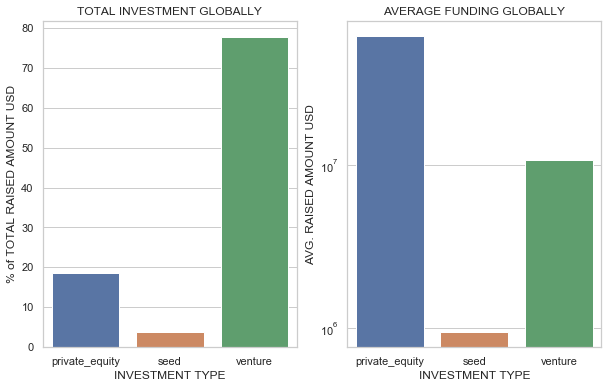

In [206]:
plt.figure(figsize=(10,6))
plt.subplot(1, 2, 1)
#fraction plot
ax = sb.barplot(x=fraction_df.index,y='raised_amount_usd',data=fraction_df,ci=None)
ax.set(xlabel='INVESTMENT TYPE', ylabel='% of TOTAL RAISED AMOUNT USD',title='TOTAL INVESTMENT GLOBALLY')

#avg plot
plt.subplot(1, 2, 2)
ax = sb.barplot(x=df_plot2.index,y='raised_amount_usd',data=df_plot2,ci=None,)
ax.set(xlabel='INVESTMENT TYPE', ylabel='AVG. RAISED AMOUNT USD',title='AVERAGE FUNDING GLOBALLY')
plt.yscale('log')
plt.show()

### A plot showing the top 9 countries against the total amount of investments of funding type FT.

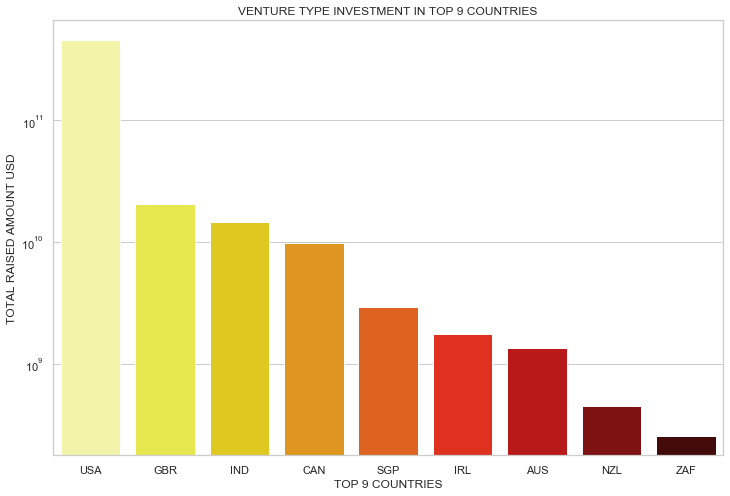

In [207]:
sb.set(style="whitegrid")
plt.figure(figsize=(12,8))

top9['raised_amount_usd'] = top9['raised_amount_usd'].astype(np.float64)
ax = sb.barplot(x=top9.index, y="raised_amount_usd",data=top9,ci=None,palette="hot_r")
ax.set(xlabel='TOP 9 COUNTRIES', ylabel='TOTAL RAISED AMOUNT USD',title='VENTURE TYPE INVESTMENT IN TOP 9 COUNTRIES')
plt.yscale('log')
plt.show()

### A plot showing the number of investments in the top 3 sectors of the top 3 countries

In [208]:
d1_top_sector = d1_investcount.sort_values(by='count_of_investment',ascending=False).head(3)
d2_top_sector = d2_investcount.sort_values(by='count_of_investment',ascending=False).head(3)
d3_top_sector = d3_investcount.sort_values(by='count_of_investment',ascending=False).head(3)

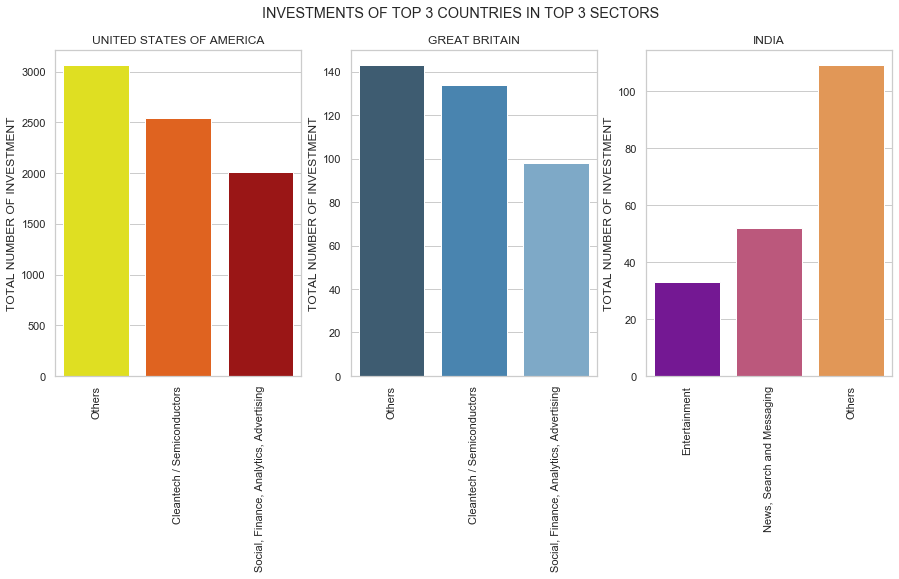

In [209]:
plt.figure(figsize=(15,6))
plt.subplot(1, 3, 1)
ax=sb.countplot(x="main_sector",palette="hot_r",data=d1[d1['main_sector'].isin(d1_top_sector['main_sector'])])
ax.set(xlabel='', ylabel='TOTAL NUMBER OF INVESTMENT',title='UNITED STATES OF AMERICA')
plt.xticks(rotation=90)

plt.subplot(1, 3, 2)
ax=sb.countplot(x="main_sector",palette="Blues_d",data=d2[d2['main_sector'].isin(d2_top_sector['main_sector'])])
ax.set(xlabel='', ylabel='TOTAL NUMBER OF INVESTMENT',title='GREAT BRITAIN')
plt.xticks(rotation=90)

plt.subplot(1, 3, 3)
ax = sb.countplot(x="main_sector",palette="plasma",data=d3[d3['main_sector'].isin(d3_top_sector['main_sector'])])
ax.set(xlabel='', ylabel='TOTAL NUMBER OF INVESTMENT',title='INDIA')
plt.suptitle("INVESTMENTS OF TOP 3 COUNTRIES IN TOP 3 SECTORS")
plt.xticks(rotation=90)
plt.show()